In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Project Title:  OLA - Ensemble Learning


# Problem Statement


- Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola.
- Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.


- As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly.
- Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.


- You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition.
- You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

- Demographics (city, age, gender etc.)
- Tenure information (joining date, Last Date)

- Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)



### Column Profiling:


- MMMM-YY : Reporting Date (Monthly)
- Driver_ID : Unique id for drivers
- Age : Age of the driver
- Gender : Gender of the driver – Male : 0, Female: 1
- City : City Code of the driver
- Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
- Income : Monthly average Income of the driver
- Date Of Joining : Joining date for the driver
- LastWorkingDate : Last date of working for the driver
- Joining Designation : Designation of the driver at the time of joining
- Grade : Grade of the driver at the time of reporting
- Total Business Value : The total business value acquired by the driver in a month (negative business indicates -cancellation/refund or car EMI adjustments)
- Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)


### Concepts Tested:

        Ensemble Learning- Bagging
        Ensemble Learning- Boosting
        KNN Imputation of Missing Values
        Working with an imbalanced dataset
        


In [3]:
ola = pd.read_csv("ola_driver_scaler.csv")

In [4]:
ola.head(5)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [5]:
df = ola.copy()

## Missing values checK :

In [6]:
(df.isna().sum()/len(df))*100

,0
Unnamed: 0,0.000000
MMM-YY,0.000000
Driver_ID,0.000000
Age,0.319305
Gender,0.272194
City,0.000000
Education_Level,0.000000
Income,0.000000
Dateofjoining,0.000000
LastWorkingDate,91.541039


In [7]:
df.head(10)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [8]:
df.shape

(19104, 14)

In [9]:
df["Driver_ID"].nunique()  # 2381 drivers data.


2381

In [10]:
df.drop(["Unnamed: 0"],axis = 1 , inplace=True)

In [11]:
df["Gender"].replace({0.0:"Male",1.0:"Female"},inplace=True)

## Analysing structure of given Data :

In [12]:
df[df["Driver_ID"]==25]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
114,01/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,2552300,3
115,02/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,2143680,3
116,03/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,2925260,3
117,04/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,1030790,4
118,05/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,1833580,4
119,06/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,999610,4
120,07/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,1046670,4
121,08/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,677050,4
122,09/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,1934570,4
123,10/01/19,25,29.0,Male,C24,1,102077,30/10/17,NaN,1,3,1297810,4


## Restructuring the data by aggregation :

In [20]:
# Restructuring the data by aggregation :
agg_df = df.groupby(["Driver_ID"]).aggregate({'MMM-YY':len,
                                     "Age":max,

                                     "City": lambda x: x.iloc[-1],  # Use iloc[-1] to get the last city
                                    "Education_Level":max,
                                     "Income":np.mean,
                                     "Dateofjoining": lambda x: x.iloc[-1], # Use iloc[-1] to get the last joining date
#                                     "LastWorkingDate":last_value, # This column is handled separately later
                                     "Joining Designation": lambda x: x.iloc[-1], # Use iloc[-1] to get the last joining designation
                                     "Grade": np.mean,
                                    "Total Business Value":sum,
                                     "Quarterly Rating":np.mean

                                    })

In [21]:
agg_df = agg_df.reset_index()


In [22]:
agg_df.head()

,Driver_ID,MMM-YY,Age,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.0
1,2,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.0
2,4,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.0
3,5,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.0
4,6,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.6


In [24]:
final_data = agg_df.rename(columns={"MMM-YY":"No_of_Records",
                      "Dateofjoining":"Date_of_joining",
                      "Joining Designation":"Joining_Designation",
                      "Total Business Value" : "Total_Business_Value",
                      "Quarterly Rating":"Quarterly_Rating"})

In [25]:
final_data

,Driver_ID,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.000000
1,2,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.000000
2,4,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.000000
3,5,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.000000
4,6,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.600000
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,24,34.0,C24,0,82815.0,15/10/15,2,3.0,21748820,2.625000
2377,2785,3,34.0,C9,0,12105.0,28/08/20,1,1.0,0,1.000000
2378,2786,9,45.0,C19,0,35370.0,31/07/18,2,2.0,2815090,1.666667
2379,2787,6,28.0,C20,2,69498.0,21/07/18,1,1.0,977830,1.500000


In [26]:
final_data = pd.merge(left = df.groupby(["Driver_ID"])["LastWorkingDate"].unique().apply(lambda x:x[-1]),
        right = final_data,
         on = "Driver_ID",
         how="outer"
    )

In [27]:
final_data.head(3)

,Driver_ID,LastWorkingDate,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,03/11/19,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.0
1,2,NaN,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.0
2,4,27/04/20,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.0


In [28]:
final_data = pd.merge(left = df.groupby(["Driver_ID"])["Gender"].unique().apply(lambda x:x[-1]),
        right = final_data,
         on = "Driver_ID",
         how="outer"
    )

In [29]:
data = final_data.copy()

In [30]:
data["Gender"].value_counts()

,count
Gender,
Male,1380
Female,956


## Target variable creation:
- ### target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

In [31]:
pd.Series(np.where(data["LastWorkingDate"].isna(),0,1)).value_counts()

,count
1,1616
0,765


In [32]:
data["Churn"] = data["LastWorkingDate"].fillna(0)

In [33]:
def apply_0_1(y):
    if y == 0:
        return 0
    if y != 0:
        return 1


In [34]:
data["Churn"] = data["Churn"].apply(apply_0_1)

In [35]:
data["Churn"].value_counts()

,count
Churn,
1,1616
0,765


In [36]:
data["Churn"].value_counts(normalize=True)*100

,proportion
Churn,
1,67.870643
0,32.129357


- ###  class 1 is the driviers who churned . 68%
- ###  class 0 is the driviers who have not churned . 32%

- ### Data is imbalanced

#### Converting date columns into Datatime format :

In [37]:
data["Date_of_joining"] = pd.to_datetime(data["Date_of_joining"])
data["LastWorkingDate"] = pd.to_datetime(data["LastWorkingDate"])

In [38]:
data["joining_Year"] = data["Date_of_joining"].dt.year


In [ ]:
#  data["joining_month"] = data["Date_of_joining"].dt.month

### checking for missing values after restructuring :

In [39]:
(data.isna().sum()/len(data))*100

,0
Driver_ID,0.000000
Gender,1.889962
LastWorkingDate,32.129357
No_of_Records,0.000000
Age,0.000000
City,0.000000
Education_Level,0.000000
Income,0.000000
Date_of_joining,0.000000
Joining_Designation,0.000000


In [40]:
data["Churn"].value_counts(normalize=True)*100

,proportion
Churn,
1,67.870643
0,32.129357


# Feature Engineering :

### whether the quarterly rating has increased for that driver
- #### for those whose quarterly rating has increased we assign the value 1

   

  

In [41]:
def app_rating_inc(y):

    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [42]:
Quarterly_Rating_increased = df.groupby("Driver_ID")["Quarterly Rating"].unique().apply(app_rating_inc)

In [43]:
data = pd.merge(left = Quarterly_Rating_increased,
        right = data,
         on = "Driver_ID",
         how="outer"
    )

In [44]:
data.head(3)

,Driver_ID,Quarterly Rating,Gender,LastWorkingDate,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year
0,1,0,Male,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.0,1,2018
1,2,0,Male,NaT,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.0,0,2020
2,4,0,Male,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.0,1,2019


In [ ]:
# df.groupby("Driver_ID")["Quarterly Rating"].unique().apply(app_rating_inc)

In [45]:
data["Quarterly_Rating_increased"] = data["Quarterly Rating"]

In [46]:
data.drop(["Quarterly Rating"],axis=1,inplace=True)

In [47]:
data.head(3)

,Driver_ID,Gender,LastWorkingDate,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,1,Male,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.0,1,2018,0
1,2,Male,NaT,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.0,0,2020,0
2,4,Male,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.0,1,2019,0


### whether the monthly income has increased for that driver -
- #### for those whose monthly income has increased we assign the value 1

In [48]:
def app_income_inc(y):

    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [ ]:
# df.groupby("Driver_ID")["Income"].unique().apply(app_income_inc).rename("Increased_Income")

In [49]:
data = pd.merge(left = df.groupby("Driver_ID")["Income"].unique().apply(app_income_inc).rename("Increased_Income"),
        right = data,
         on = "Driver_ID",
         how="outer"
    )

In [50]:
data

,Driver_ID,Increased_Income,Gender,LastWorkingDate,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,1,0,Male,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.000000,1,2018,0
1,2,0,Male,NaT,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.000000,0,2020,0
2,4,0,Male,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.000000,1,2019,0
3,5,0,Male,2019-03-07,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.000000,1,2019,0
4,6,0,Female,NaT,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,Male,NaT,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.625000,0,2015,1
2377,2785,0,Female,2020-10-28,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.000000,1,2020,0
2378,2786,0,Male,2019-09-22,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.666667,1,2018,0
2379,2787,0,Female,2019-06-20,6,28.0,C20,2,69498.0,2018-07-21,1,1.0,977830,1.500000,1,2018,0


In [51]:
Mdata = data.copy()

In [52]:
Mdata["Gender"].replace({"Male":0,
                       "Female":1},inplace=True)

In [53]:
Mdata.drop(["Driver_ID"],axis = 1, inplace=True)

In [54]:
Mdata.isna().sum()

,0
Increased_Income,0
Gender,45
LastWorkingDate,765
No_of_Records,0
Age,0
City,0
Education_Level,0
Income,0
Date_of_joining,0
Joining_Designation,0


In [55]:
Mdata

,Increased_Income,Gender,LastWorkingDate,No_of_Records,Age,City,Education_Level,Income,Date_of_joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,0,0.0,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.000000,1,2018,0
1,0,0.0,NaT,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.000000,0,2020,0
2,0,0.0,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.000000,1,2019,0
3,0,0.0,2019-03-07,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.000000,1,2019,0
4,0,1.0,NaT,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0.0,NaT,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.625000,0,2015,1
2377,0,1.0,2020-10-28,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.000000,1,2020,0
2378,0,0.0,2019-09-22,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.666667,1,2018,0
2379,0,1.0,2019-06-20,6,28.0,C20,2,69498.0,2018-07-21,1,1.0,977830,1.500000,1,2018,0


In [56]:
pd.to_datetime("2021-06-01")

Timestamp('2021-06-01 00:00:00')

In [57]:
Mdata["LastWorkingDate"] = Mdata["LastWorkingDate"].fillna(pd.to_datetime("2021-06-01"))

In [58]:
(Mdata["LastWorkingDate"] - Mdata["Date_of_joining"])

,0
0,77 days
1,207 days
2,142 days
3,57 days
4,305 days
...,...
2376,2056 days
2377,61 days
2378,418 days
2379,334 days


In [59]:
Mdata["Driver_tenure_days"] = (Mdata["LastWorkingDate"] - Mdata["Date_of_joining"])

In [60]:
Mdata["Driver_tenure_days"] = Mdata["Driver_tenure_days"].dt.days

In [61]:
Mdata.drop(["LastWorkingDate","Date_of_joining"],inplace=True,axis = 1)

In [62]:
Mdata.drop(["Driver_tenure_days"],inplace=True,axis = 1)

In [64]:
Mdata

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,0,0.0,3,28.0,C23,2,57387.0,1,1.0,1715580,2.000000,1,2018,0
1,0,0.0,2,31.0,C7,2,67016.0,2,2.0,0,1.000000,0,2020,0
2,0,0.0,5,43.0,C13,2,65603.0,2,2.0,350000,1.000000,1,2019,0
3,0,0.0,3,29.0,C9,0,46368.0,1,1.0,120360,1.000000,1,2019,0
4,0,1.0,5,31.0,C11,1,78728.0,3,3.0,1265000,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0.0,24,34.0,C24,0,82815.0,2,3.0,21748820,2.625000,0,2015,1
2377,0,1.0,3,34.0,C9,0,12105.0,1,1.0,0,1.000000,1,2020,0
2378,0,0.0,9,45.0,C19,0,35370.0,2,2.0,2815090,1.666667,1,2018,0
2379,0,1.0,6,28.0,C20,2,69498.0,1,1.0,977830,1.500000,1,2018,0


In [65]:
Mdata.columns

Index(['Increased_Income', 'Gender', 'No_of_Records', 'Age', 'City', 'Education_Level', 'Income', 'Joining_Designation', 'Grade', 'Total_Business_Value', 'Quarterly_Rating', 'Churn', 'joining_Year', 'Quarterly_Rating_increased'], dtype='object')

In [67]:
Mdata["Grade"] = np.round(Mdata["Grade"])

In [68]:
Mdata["Quarterly_Rating"]= Mdata["Quarterly_Rating"].round()

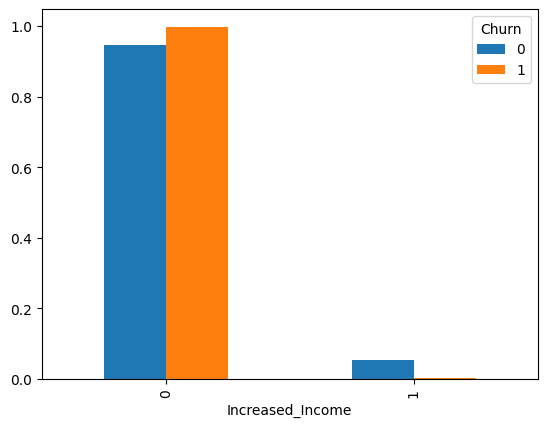

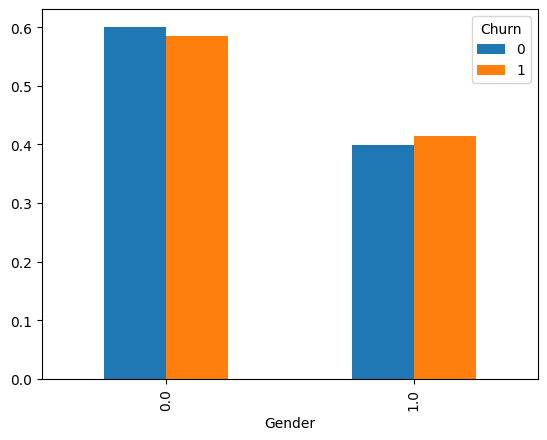

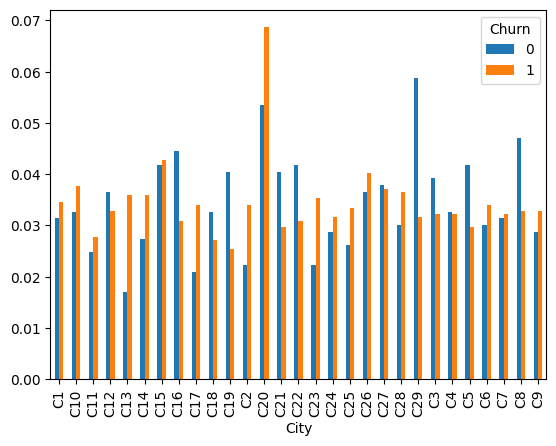

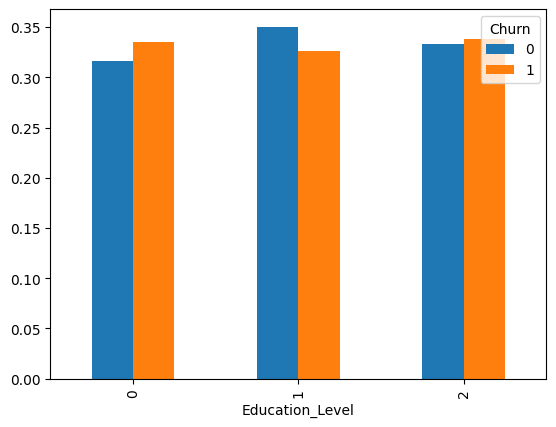

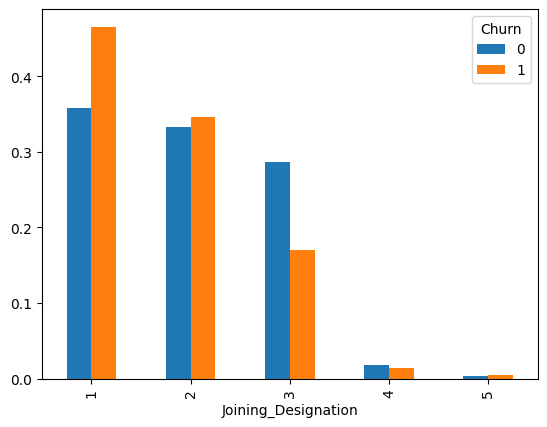

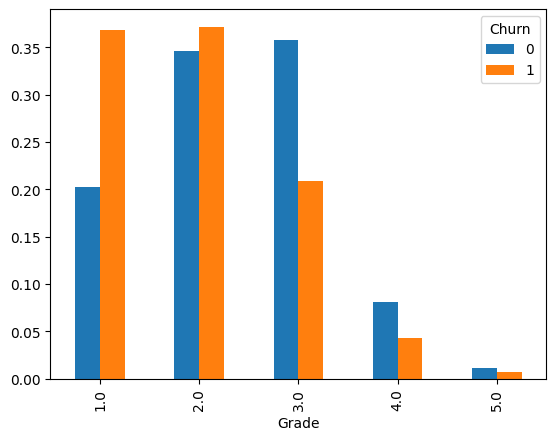

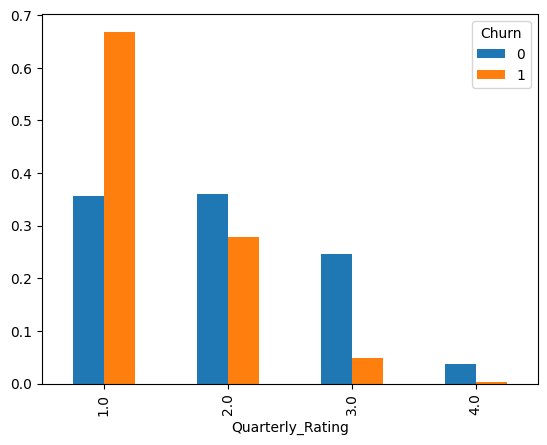

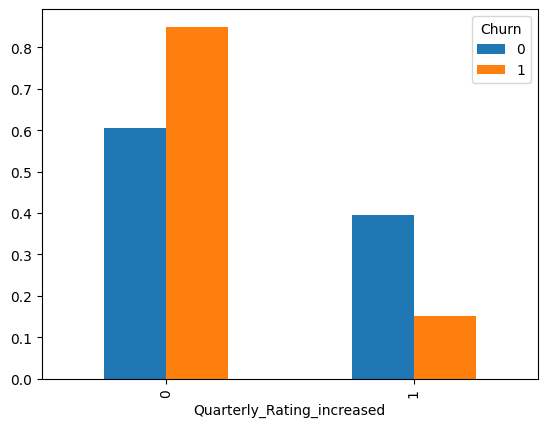

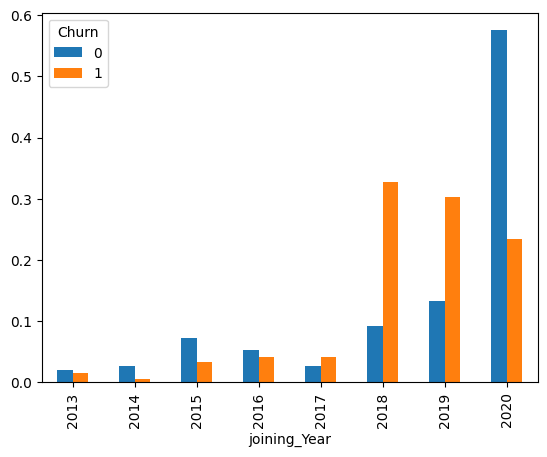

In [69]:
categorical_features = ['Increased_Income', 'Gender','City','Education_Level',
                   'Joining_Designation','Grade','Quarterly_Rating','Quarterly_Rating_increased',"joining_Year"]

for col in categorical_features:
    pd.crosstab(index = Mdata[col],
               columns = Mdata["Churn"],
               normalize="columns").plot(kind = "bar")
    plt.show()

In [70]:
Mdata.isna().sum()

,0
Increased_Income,0
Gender,45
No_of_Records,0
Age,0
City,0
Education_Level,0
Income,0
Joining_Designation,0
Grade,0
Total_Business_Value,0


## SimpleImputer

In [71]:
from sklearn.impute import SimpleImputer

In [72]:
imputer = SimpleImputer(strategy='most_frequent')

In [73]:
Mdata["Gender"] = imputer.fit_transform(X=Mdata["Gender"].values.reshape(-1,1),y=Mdata["Churn"].values.reshape(-1,1))

In [74]:
Mdata["Gender"].value_counts(dropna=False)

,count
Gender,
0.0,1425
1.0,956


In [75]:
Mdata.isna().sum()

,0
Increased_Income,0
Gender,0
No_of_Records,0
Age,0
City,0
Education_Level,0
Income,0
Joining_Designation,0
Grade,0
Total_Business_Value,0


## TargetEncoder

In [77]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.2 MB/s eta 0:00:00


In [78]:
from category_encoders import TargetEncoder
TE = TargetEncoder()

In [79]:
Mdata["City"] = TE.fit_transform(X = Mdata["City"],y = Mdata["Churn"])



In [80]:
Mdata["joining_Year"] = TE.fit_transform(X = Mdata["joining_Year"],y = Mdata["Churn"])


In [81]:
Mdata

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,0,0.0,3,28.0,0.769859,2,57387.0,1,1.0,1715580,2.0,1,2018,0
1,0,0.0,2,31.0,0.684190,2,67016.0,2,2.0,0,1.0,0,2020,0
2,0,0.0,5,43.0,0.816064,2,65603.0,2,2.0,350000,1.0,1,2019,0
3,0,0.0,3,29.0,0.706553,0,46368.0,1,1.0,120360,1.0,1,2019,0
4,0,1.0,5,31.0,0.702829,1,78728.0,3,3.0,1265000,2.0,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0.0,24,34.0,0.698531,0,82815.0,2,3.0,21748820,3.0,0,2015,1
2377,0,1.0,3,34.0,0.706553,0,12105.0,1,1.0,0,1.0,1,2020,0
2378,0,0.0,9,45.0,0.570044,0,35370.0,2,2.0,2815090,2.0,1,2018,0
2379,0,1.0,6,28.0,0.730263,2,69498.0,1,1.0,977830,2.0,1,2018,0


In [ ]:
# Mdata.drop(["No_of_Records"], axis = 1 , inplace= True)

<Axes: >

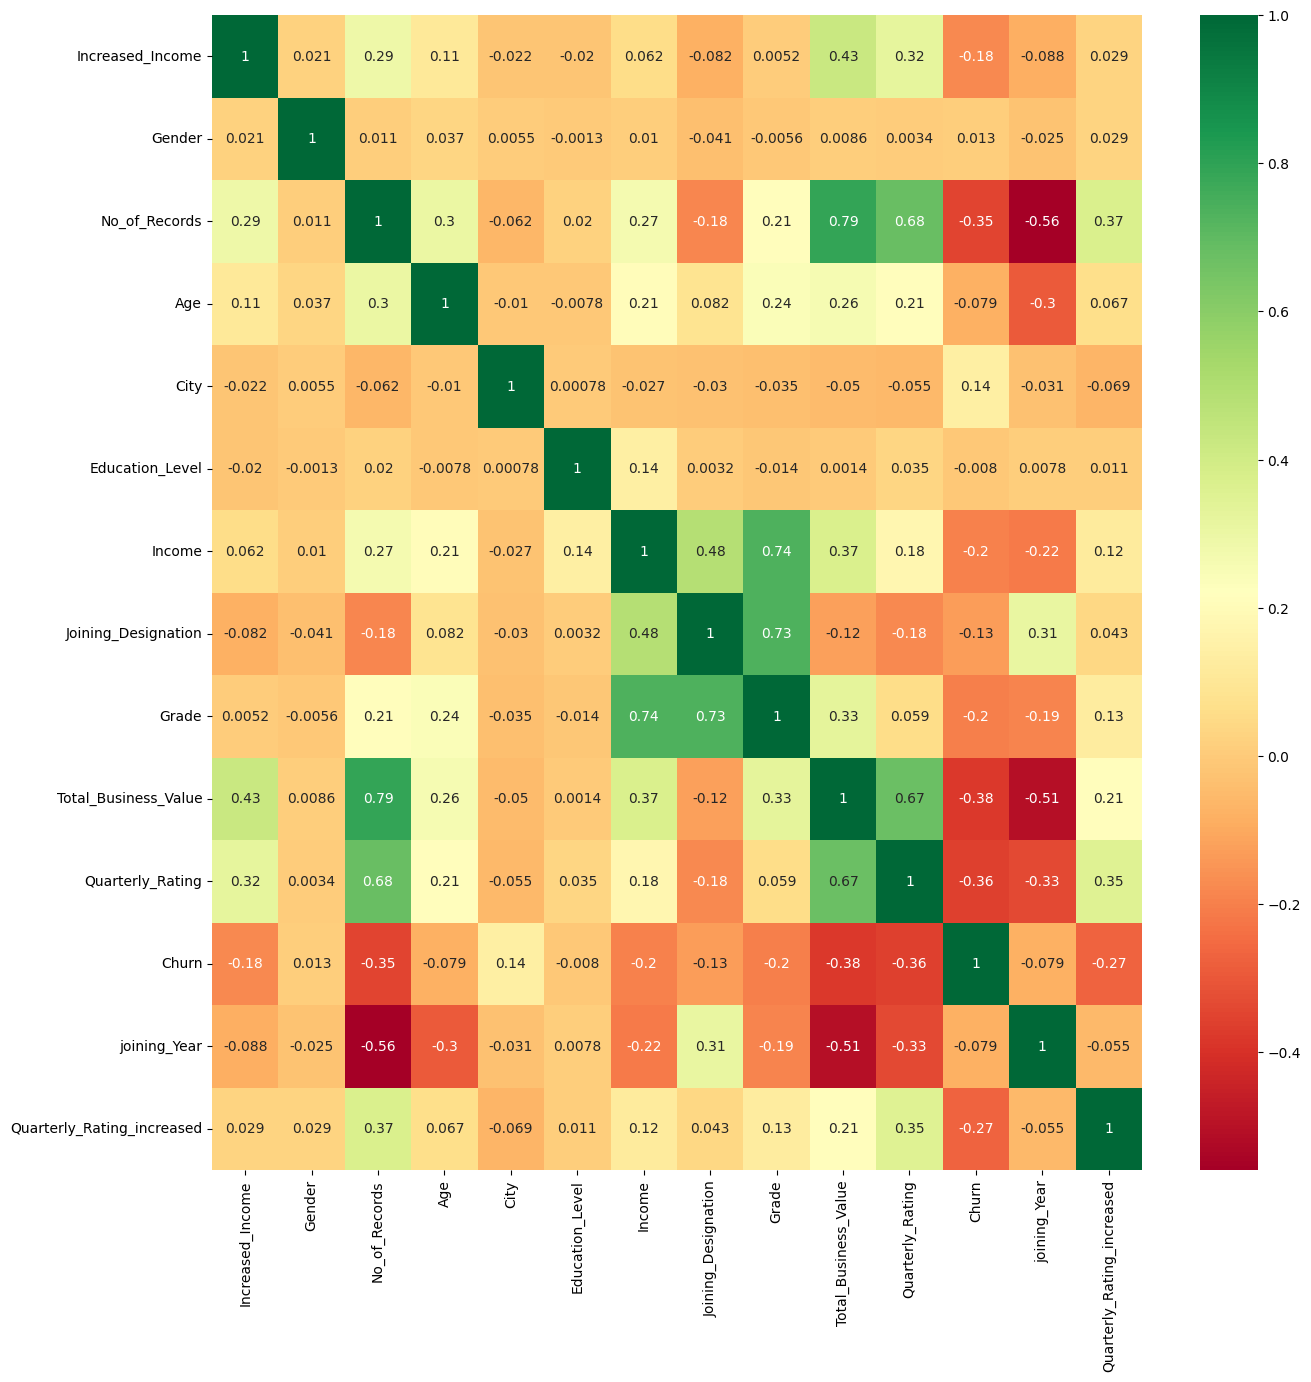

In [82]:
plt.figure(figsize=(15, 15))
sns.heatmap(Mdata.corr(),annot=True, cmap="RdYlGn", annot_kws={"size":10})

sns.heatmap(Mdata.corr())

In [83]:
X = Mdata.drop(["Churn"],axis = 1)
y = Mdata["Churn"]

In [84]:
Mdata.head(3)

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,0,0.0,3,28.0,0.769859,2,57387.0,1,1.0,1715580,2.0,1,2018,0
1,0,0.0,2,31.0,0.684190,2,67016.0,2,2.0,0,1.0,0,2020,0
2,0,0.0,5,43.0,0.816064,2,65603.0,2,2.0,350000,1.0,1,2019,0


## KNNImputer

In [85]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)



In [86]:
X = pd.DataFrame(imputer.fit_transform(X),columns=X.columns)

In [87]:
X

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,joining_Year,Quarterly_Rating_increased
0,0.0,0.0,3.0,28.0,0.769859,2.0,57387.0,1.0,1.0,1715580.0,2.0,2018.0,0.0
1,0.0,0.0,2.0,31.0,0.684190,2.0,67016.0,2.0,2.0,0.0,1.0,2020.0,0.0
2,0.0,0.0,5.0,43.0,0.816064,2.0,65603.0,2.0,2.0,350000.0,1.0,2019.0,0.0
3,0.0,0.0,3.0,29.0,0.706553,0.0,46368.0,1.0,1.0,120360.0,1.0,2019.0,0.0
4,0.0,1.0,5.0,31.0,0.702829,1.0,78728.0,3.0,3.0,1265000.0,2.0,2020.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.0,0.0,24.0,34.0,0.698531,0.0,82815.0,2.0,3.0,21748820.0,3.0,2015.0,1.0
2377,0.0,1.0,3.0,34.0,0.706553,0.0,12105.0,1.0,1.0,0.0,1.0,2020.0,0.0
2378,0.0,0.0,9.0,45.0,0.570044,0.0,35370.0,2.0,2.0,2815090.0,2.0,2018.0,0.0
2379,0.0,1.0,6.0,28.0,0.730263,2.0,69498.0,1.0,1.0,977830.0,2.0,2018.0,0.0


In [88]:
X.describe()

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,joining_Year,Quarterly_Rating_increased
count,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000
mean,0.018480,0.401512,8.02352,33.663167,0.678662,1.00756,59232.460484,1.820244,2.078538,4.586742e+06,1.573289,2018.536329,0.228895
std,0.134706,0.490307,6.78359,5.983375,0.065356,0.81629,28298.214012,0.841433,0.931321,9.127115e+06,0.745987,1.609597,0.420210
min,0.000000,0.000000,1.00000,21.000000,0.531324,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,2013.000000,0.000000
25%,0.000000,0.000000,3.00000,29.000000,0.634237,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,2018.000000,0.000000
50%,0.000000,0.000000,5.00000,33.000000,0.698531,1.00000,55285.000000,2.000000,2.000000,8.176800e+05,1.000000,2019.000000,0.000000
75%,0.000000,1.000000,10.00000,37.000000,0.719430,2.00000,75835.000000,2.000000,3.000000,4.173650e+06,2.000000,2020.000000,0.000000
max,1.000000,1.000000,24.00000,58.000000,0.816064,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,2020.000000,1.000000


## train_test_split

In [89]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train ,y_test = train_test_split(X,y,
                                                    random_state=5,
                                                    test_size=0.2)

In [90]:
y.value_counts()

,count
Churn,
1,1616
0,765


In [91]:
765 + 1616

2381

## StandardScaler

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

In [94]:
scaler.fit(X_train)


StandardScaler()

In [95]:
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)

## RandomForestClassifier

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight="balanced",
    ccp_alpha=0.0085,
    max_samples=None,)

In [99]:
RF.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.0085, class_weight='balanced',
                       criterion='entropy', max_depth=10)

In [100]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.8634453781512605, 0.8658280922431866)

In [101]:
RF.feature_importances_

array([0.00305692, 0.0005652 , 0.27454084, 0.0106561 , 0.0146446 ,
       0.0009989 , 0.01868616, 0.02742059, 0.01697799, 0.17364223,
       0.07672742, 0.33039708, 0.05168595])

In [102]:
X.columns

Index(['Increased_Income', 'Gender', 'No_of_Records', 'Age', 'City', 'Education_Level', 'Income', 'Joining_Designation', 'Grade', 'Total_Business_Value', 'Quarterly_Rating', 'joining_Year', 'Quarterly_Rating_increased'], dtype='object')

<Axes: >

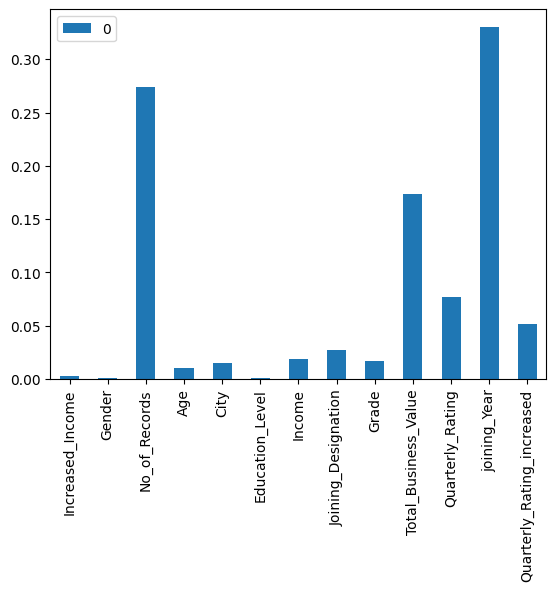

In [103]:
pd.DataFrame(data=RF.feature_importances_,
            index=X.columns).plot(kind="bar")

In [104]:
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix



In [105]:
confusion_matrix(y_test,RF.predict(X_test) )

array([[148,  14],
       [ 50, 265]])

In [106]:
confusion_matrix(y_train,RF.predict(X_train) )

array([[ 558,   45],
       [ 215, 1086]])

In [107]:
f1_score(y_test,RF.predict(X_test)),f1_score(y_train,RF.predict(X_train))

(0.8922558922558923, 0.8930921052631579)

In [108]:
precision_score(y_test,RF.predict(X_test)),precision_score(y_train,RF.predict(X_train))

(0.9498207885304659, 0.9602122015915119)

In [109]:
recall_score(y_test,RF.predict(X_test)),recall_score(y_train,RF.predict(X_train))

(0.8412698412698413, 0.8347425057647964)

## GridSearchCV - on RandomForestClassifier

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[7,10,15],
             "n_estimators":[100,200,300,400],
             "max_features":[4,7,10],
             "ccp_alpha":[0.0005,0.00075,0.001]}

RFC = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator = RFC,
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,                   # need not to train again after grid search
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


In [111]:
grid_search.fit(X_train,y_train.values.ravel())


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0005, 0.00075, 0.001],
                         'max_depth': [7, 10, 15], 'max_features': [4, 7, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [112]:
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0.0005, max_depth=10, max_features=7,
                       n_estimators=400)

In [113]:
grid_search.best_score_

np.float64(0.8876176755508086)

In [114]:
grid_search.best_params_

{'ccp_alpha': 0.0005, 'max_depth': 10, 'max_features': 7, 'n_estimators': 400}

In [115]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,

    class_weight="balanced",
    ccp_alpha=0.0001,
    max_samples=None)

In [116]:
RF.fit(X_train , y_train)

RandomForestClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       criterion='entropy', max_depth=7)

In [117]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.9065126050420168, 0.8867924528301887)

In [118]:
y_test_pred = RF.predict(X_test)
y_train_pred = RF.predict(X_train)

In [119]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)


(0.9117647058823529, 0.9290271132376395)

In [120]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)


(0.9393939393939394, 0.9652029826014913)

In [121]:
recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.8857142857142857, 0.8954650269023828)

## BaggingClassifier

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
from sklearn.ensemble import BaggingClassifier

In [126]:
bagging_classifier_model = BaggingClassifier(estimator= DecisionTreeClassifier(max_depth=7,
                                                                                     class_weight="balanced"),
                                            n_estimators=50,
                                            max_samples=1.0,
                                            max_features=1.0,
                                            bootstrap=True,
                                            bootstrap_features=False,
                                            oob_score=False,
                                            warm_start=False,
                                            n_jobs=None,
                                            random_state=None,
                                            verbose=0,)

In [127]:
bagging_classifier_model.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   max_depth=7),
                  n_estimators=50)

In [128]:

from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix


In [129]:
y_test_pred = bagging_classifier_model.predict(X_test)
y_train_pred = bagging_classifier_model.predict(X_train)

In [130]:

confusion_matrix(y_test,y_test_pred)

array([[143,  19],
       [ 41, 274]])

In [131]:

confusion_matrix(y_train,y_train_pred)

array([[ 559,   44],
       [ 124, 1177]])

In [132]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)


(0.9013157894736842, 0.9333862014274386)

In [133]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)


(0.9351535836177475, 0.963963963963964)

In [134]:

recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.8698412698412699, 0.9046887009992314)

In [135]:
bagging_classifier_model.score(X_test,y_test)

0.8742138364779874

In [136]:
bagging_classifier_model.score(X_train,y_train)

0.9117647058823529

In [ ]:
# !pip install xgboost

In [137]:
from xgboost import XGBClassifier

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[2,4,6,10],
             "n_estimators":[100,200,300,400]    }


grid_search = GridSearchCV(
    estimator = XGBClassifier(),
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,                   # need not to train again after grid search
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


grid_search.fit(X_train,y_train.values.ravel())

grid_search.best_estimator_

grid_search.best_score_

grid_search.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [154]:
grid_search.best_score_

np.float64(0.8792079617808026)

In [139]:
xgb = XGBClassifier(n_estimators=100,
                   max_depth = 2)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [140]:
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

In [141]:
confusion_matrix(y_test,y_test_pred)

array([[124,  38],
       [ 27, 288]])

In [142]:
confusion_matrix(y_train,y_train_pred)

array([[ 518,   85],
       [  74, 1227]])

In [143]:
xgb.score(X_train,y_train),xgb.score(X_test,y_test)

(0.9164915966386554, 0.8637316561844863)

In [144]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)


(0.8985959438377535, 0.939150401836969)

In [145]:

recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.9142857142857143, 0.9431206764027671)

In [146]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)


(0.8834355828220859, 0.9352134146341463)

In [147]:
xgb.feature_importances_

array([0.        , 0.01611706, 0.17770752, 0.01213652, 0.0177371 ,
       0.01956165, 0.01636491, 0.02013278, 0.01096871, 0.05184174,
       0.22887574, 0.35447577, 0.07408047], dtype=float32)

In [164]:
np.sort(list(zip(X.columns,xgb.feature_importances_)))

array([['0.0', 'Increased_Income'],
       ['0.01611706', 'Gender'],
       ['0.17770752', 'No_of_Records'],
       ['0.012136516', 'Age'],
       ['0.017737104', 'City'],
       ['0.019561648', 'Education_Level'],
       ['0.016364906', 'Income'],
       ['0.020132776', 'Joining_Designation'],
       ['0.0109687075', 'Grade'],
       ['0.051841743', 'Total_Business_Value'],
       ['0.22887574', 'Quarterly_Rating'],
       ['0.35447577', 'joining_Year'],
       ['0.074080475', 'Quarterly_Rating_increased']], dtype='<U32')

<Axes: >

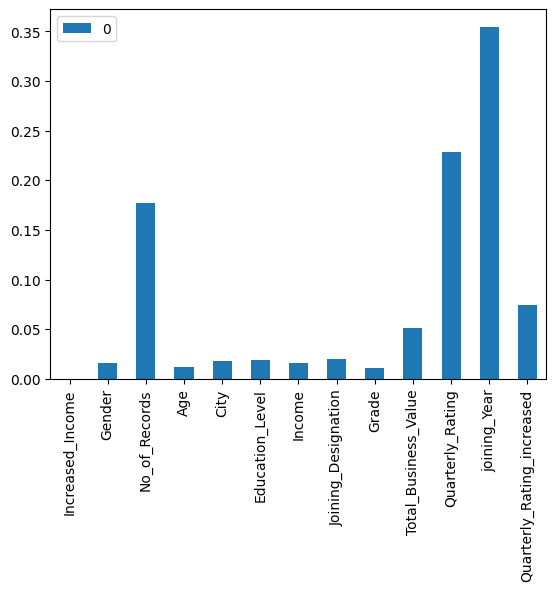

In [148]:
pd.DataFrame(data=xgb.feature_importances_,
            index=X.columns).plot(kind="bar")

## GradientBoostingClassifier

In [149]:
def GradientBoostingClassifier(X, y):
    from sklearn.ensemble import  GradientBoostingClassifier
    from sklearn.metrics import f1_score, accuracy_score , roc_auc_score,auc,recall_score,precision_score
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=1)

    lr = GradientBoostingClassifier()
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    prob = lr.predict_proba(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print('Train Score : ', lr.score(X_train, y_train), '\n')
    print('Test Score : ', lr.score(X_test, y_test), '\n')
    print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
    print(cm, "---> confusion Matrix ", '\n')
    print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test, prob[:, 1]),'\n')
    print("precision score  test dataset:  ", precision_score(y_test, y_pred),'\n')
    print("Recall score  test dataset:  ", recall_score(y_test, y_pred), '\n')
    print("f1 score  test dataset :  ", f1_score(y_test, y_pred), '\n')
    return (prob[:,1], y_test)

In [150]:
probs , y_test = GradientBoostingClassifier(X,y)

Train Score :  0.914390756302521 

Test Score :  0.8909853249475891 

Accuracy Score :  0.8909853249475891 

[[125  23]
 [ 29 300]] ---> confusion Matrix  

ROC-AUC score  test dataset:   0.9449293518442454 

precision score  test dataset:   0.9287925696594427 

Recall score  test dataset:   0.9118541033434651 

f1 score  test dataset :   0.9202453987730062 



In [151]:
def plot_pre_curve(y_test,probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("Precision Recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()

def plot_roc(y_test,prob):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

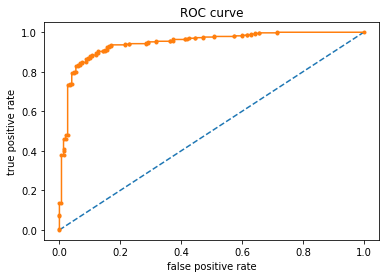

In [ ]:
plot_roc(y_test , probs)

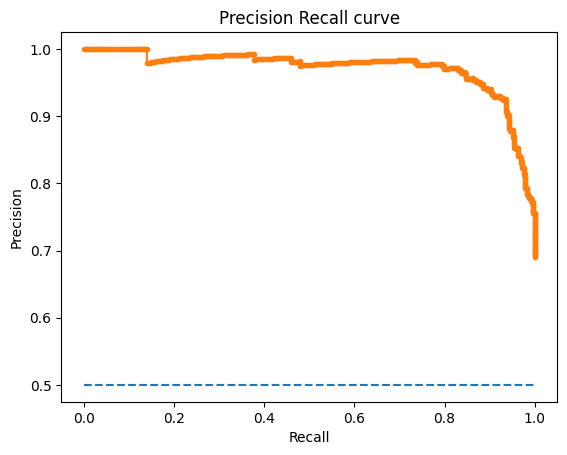

In [152]:
plot_pre_curve(y_test , probs)

# Inferences :

from data  distribution:
Male      1380
Female     956

Churn : distribution:

  1   : 1616 (67.870%)

  0   : 765 (32.12%)


- Probability of Churn is higher in case of education level 0 and 1 than 2.
- in case of joining destination 1, probability of churn is higher.



- in case of quarterly rating is 1, probability of churn is significantly higher.
- also same pattern is observed in case of when driver's quarterly rating has increased through out tenure.




- due to some reason , for drivers who joined in 2018 and 2019 , probability of churn is very high compare to 2020 and before 2018.



#### Random Forest :
- train and test score : (0.8634453781512605, 0.8658280922431866)
- feature importance : highest is : joining year , followed by No of records available in data, and total business value.
- recall : 0.841
- precision: 0.949
- f1-score : 0.892


#### on Grid Search CV : RF :
- best params : ccp_alpha=0.0005, max_depth=10, max_features=7,n_estimators=400
- Gridsearch RF best score : 0.8876176755508086

#### Bagging Classfier : wwith Decision Tree :
- with 50 DTs. when max_depth=7, class_weight="balanced"
- f1 score : 0.9013157894736842
- precision : 0.9351535836177475
- recall_score : 0.9431206764027671
- accuracy: 0.874213836477




#### XGBoost Classifier: (Grid SEARCH CV : ) 'max_depth': 2, 'n_estimators': 100

- test Scores :
- Accuracy : 0.8637
- f1 score : 0.898
- recall : 0.914
- precision : 0.8834

- feature importance : highest is : joining year , followed by No of records available in data, and total business value.
       ['0.17770752', 'No_of_Records']
       ['0.22887574', 'Quarterly_Rating']
       ['0.35447577', 'joining_Year']



#### GradientBoostingClassifier : GBDC:

- Train Score :  0.914390756302521
- Test Score :  0.8909853249475891
- Accuracy Score :  0.8909853249475891
- ROC-AUC score  test dataset:   0.9449293518442454
- precision score  test dataset:   0.9287925696594427
- Recall score  test dataset:   0.9118541033434651
- f1 score  test dataset :   0.9202453987730062











